In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import sys
sys.path.insert(1, '../scripts/')
from identification import *

In [2]:
def displayImage(img, cmap='gray', rectangles=None):    
    plt.figure(figsize=(16, 12))
    if rectangles:
        for rectangle in rectangles:
            (x, y, w, h) = rectangle.unpack()
            cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 5)
    plt.imshow(cv.GaussianBlur(img, (5, 5), 1), cmap)
    plt.show()

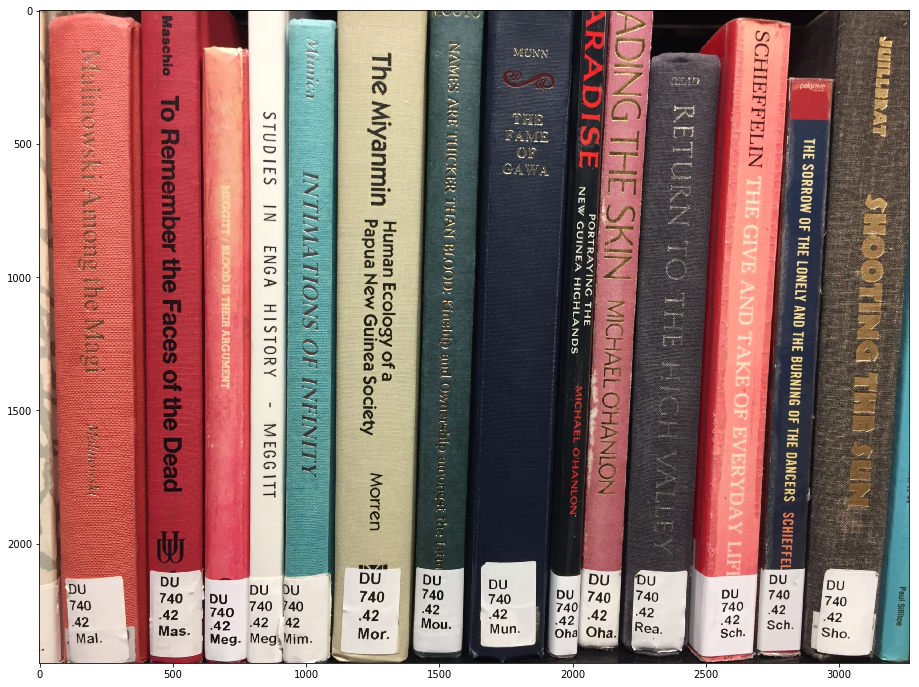

In [3]:
books = BooksImage('../notebooks/pictures/books8.jpg')
displayImage(books.img_rgb)

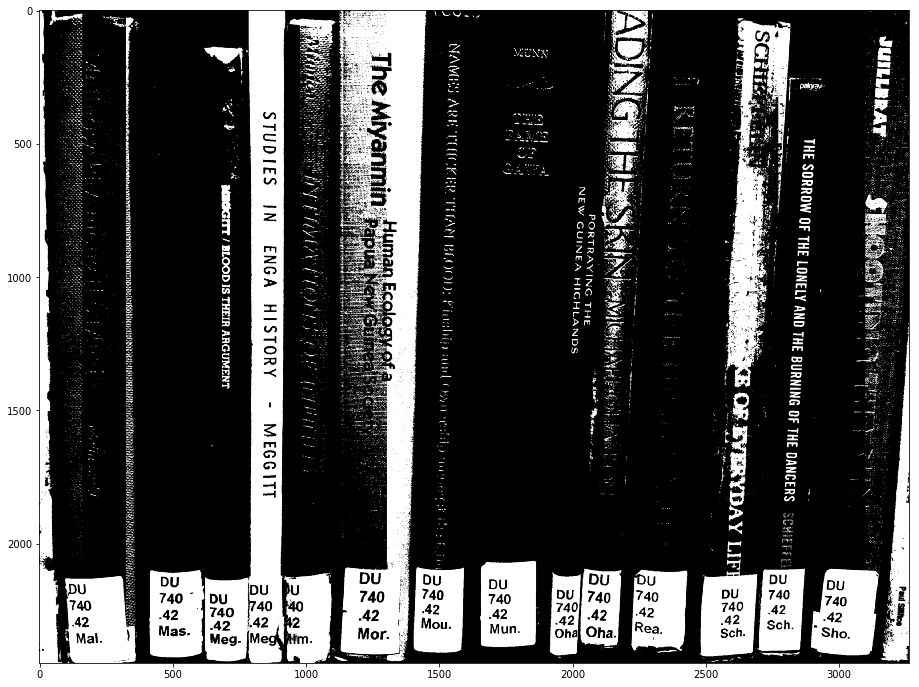

In [4]:
books.generateBinaryImage()
displayImage(books.img_binary)

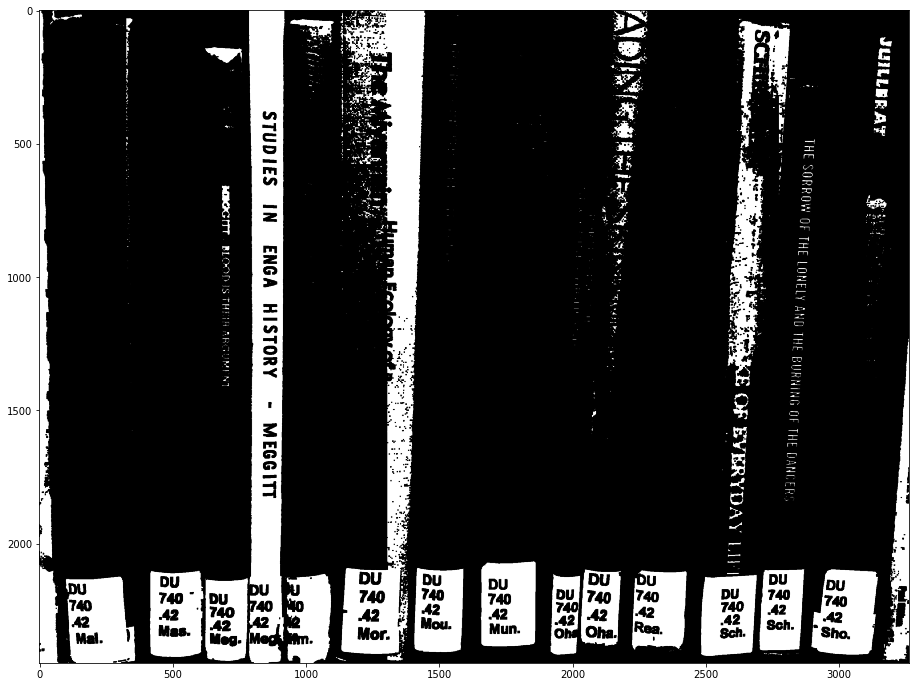

In [5]:
books.erodeBinaryImage()
displayImage(books.img_eroded)

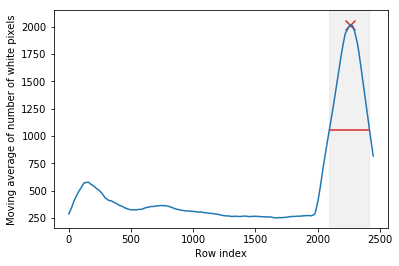

In [6]:
row_sum = np.sum(books.img_eroded, axis=1) / 255
moving_average_row = movingAverage(row_sum, books.M / 10)


min_height = int(books.N / 2)
peaks, _ = find_peaks(moving_average_row, height=min_height)  # Finds the local maxima
widths = peak_widths(moving_average_row, peaks, rel_height=0.8)

plt.figure(figsize=(6,4))
plt.plot(list(range(books.M)), moving_average_row)
plt.scatter(peaks, moving_average_row[peaks], marker='x', s=100, color='C3')
plt.xlabel('Row index')
plt.ylabel('Moving average of number of white pixels')
plt.hlines(*widths[1:], color="C3")
plt.axvspan(widths[2], widths[3], alpha=0.1, color='C7')
plt.show()

In [7]:
widths

(array([321.5468265]),
 array([1057.80555556]),
 array([2095.95278287]),
 array([2417.49960938]))

In [8]:
books.row_bounds
displayImage(books.img_eroded[row_bounds[0][0] : row_bounds[0][1]])

NameError: name 'row_bounds' is not defined

In [ ]:
print(peaks)
_, _, top, bottom = peak_widths(moving_average_row, peaks, rel_height=0.8)
print(top, bottom)

In [ ]:
row_bounds = list(zip(top.astype('int'), bottom.astype('int')))
row_bounds

In [ ]:
books.findLabels()
displayImage(books.img_rgb, rectangles=books.label_rectangles)

In [ ]:
plt.figure(figsize=(16, 12))
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 1]})
ax[0].imshow(books.img_eroded, cmap='gray')
ax[1].plot(moving_average_row, list(range(books.M)))
ax[1].scatter(moving_average_row[peaks], peaks, marker='x', s=100, color='C3')
ax[1].set_ylabel('Row index')
ax[1].set_xlabel('Moving average of number of white pixels')
ax[1].vlines(*widths[1:], color="C3")
ax[1].axhspan(widths[2], widths[3], alpha=0.1, color='C7')
plt.show()

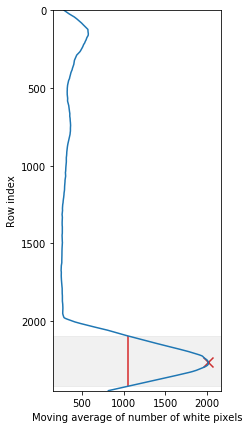

In [10]:
plt.figure(figsize=(3,7))
plt.plot(moving_average_row, list(range(books.M)))
plt.scatter(moving_average_row[peaks], peaks, marker='x', s=100, color='C3')
plt.ylabel('Row index')
plt.xlabel('Moving average of number of white pixels')
plt.vlines(*widths[1:], color="C3")
plt.axhspan(widths[2], widths[3], alpha=0.1, color='C7')
plt.gca().invert_yaxis()
plt.ylim(ymax=0, ymin=books.M)

plt.show()